# MCMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats, optimize, interpolate
from random import uniform

In [2]:
def gauss(x,mu,sigma,A = 1):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)


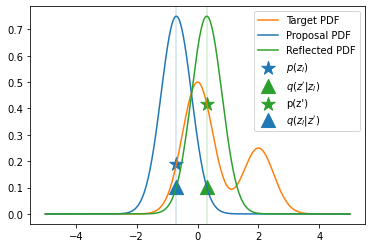

In [124]:
plt.plot(np.linspace(-5, 5, 1000), [bimodal(i, 0, 0.5, 0.5, 2, 0.5, 0.25) for i in np.linspace(-5, 5, 1000)], label = "Target PDF", c = "C1")
r = -0.7
plt.scatter(r, bimodal(r, 0, 0.5, 0.5, 2, 0.5, 0.25), c = "C0", label = "$p(z_{l})$", marker = "*", s = 200)
plt.axvline(r, c = "C0", alpha = 0.2)
plt.plot(np.linspace(-5, 5, 1000), [gauss(i, r, 0.5,0.75) for i in np.linspace(-5, 5, 1000)], label = "Proposal PDF")

# z = np.random.normal(r, 1) 
z = 0.3
plt.axvline(z, c = "C2", alpha = 0.2)
plt.scatter(z, gauss(z, r, 0.5,0.75), c = "C2", label = "$q(z'|z_{l})$", marker = "^", s = 200)
plt.scatter(z, bimodal(z, 0, 0.5, 0.5, 2, 0.5, 0.25), c = "C2", label = "p(z')", marker = "*", s = 200)

plt.plot(np.linspace(-5, 5, 1000), [gauss(i, z, 0.5,0.75) for i in np.linspace(-5, 5, 1000)], label = "Reflected PDF", c = "C2")
plt.scatter(r, gauss(r, z, 0.5,0.75), c = "C0", label = "$q(z_{l}|z')$", marker = "^", s = 200)

plt.legend()